## **TASK 1**

## Libraries used

In [0]:
import keras
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

## Importing MNIST

In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Spliting trian and validation from train as 80% train data and 20% test data.

In [0]:
train_x, val_x = train_test_split(x_train, test_size=0.2)

Normalizing the data and reshaping the data

In [0]:
train_x=train_x/255
val_x=val_x/255
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

* Adding Noise to the images.
* Noise used : Salt and Pepper noise
* Noise percentage: 20%

In [0]:
noise = augmenters.SaltAndPepper(0.2)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

Images without noice.

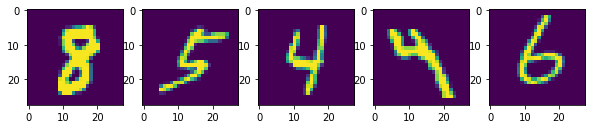

In [15]:
f, ax = plt.subplots(1,5)
f.set_size_inches(10, 5)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

Images with added noice

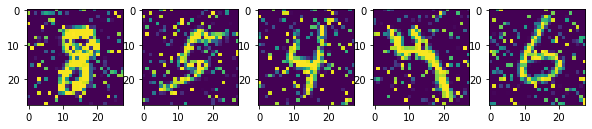

In [16]:
f, ax = plt.subplots(1,5)
f.set_size_inches(10,5)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

### Denoising Autoencoder for MNIST dataset 

In [0]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoding architecture
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [18]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 16)          0   

In [19]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=200, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 13s 269us/step - loss: 0.0765 - val_loss: 0.0623
Epoch 2/200
48000/48000 [==============================] - 3s 64us/step - loss: 0.0558 - val_loss: 0.0496
Epoch 3/200
48000/48000 [==============================] - 3s 64us/step - loss: 0.0462 - val_loss: 0.0434
Epoch 4/200
48000/48000 [==============================] - 3s 64us/step - loss: 0.0405 - val_loss: 0.0378
Epoch 5/200
48000/48000 [==============================] - 3s 64us/step - loss: 0.0384 - val_loss: 0.0353
Epoch 6/200
48000/48000 [==============================] - 3s 64us/step - loss: 0.0343 - val_loss: 0.0325
Epoch 7/200
48000/48000 [==============================] - 3s 64us/step - loss: 0.0314 - val_loss: 0.0300
Epoch 8/200
48000/48000 [==============================] - 3s 64us/step - loss: 0.0290 - val_loss: 0.0280
Epoch 9/200
48000/48000 [==============================] - 3s 64us/step - loss: 0.0270 - val_loss: 0

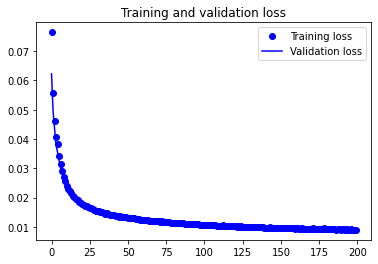

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(200)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

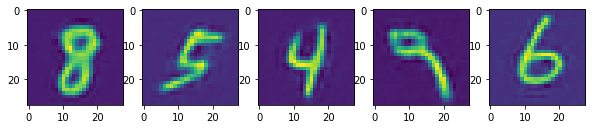

In [21]:
preds = model_2.predict(train_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(10, 5)
for i in range(5,10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()

In [0]:
model_2.save_weights('model_2.h5')

## **TASK 2**

Accessing Fashion mnist dataset from kaggle

In [23]:
import os

os.environ['KAGGLE_USERNAME'] = "prathapnsvr" # username from the json file
os.environ['KAGGLE_KEY'] = "7859de3ed4a8bf1bc9daac2fc2d0430a" # key from the json file
!kaggle datasets download -d zalando-research/fashionmnist

 68% 47.0M/68.8M [00:00<00:00, 190MB/s]
100% 68.8M/68.8M [00:00<00:00, 229MB/s]


In [0]:
! unzip -q /content/fashionmnist.zip

In [0]:
data_train = pd.read_csv("fashion-mnist_train.csv")
data_test = pd.read_csv("fashion-mnist_test.csv")

Data preproccessing and normalizing 

In [0]:
img_rows, img_cols = 28, 28
input_shapes = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

#Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=13)

#Test data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255
X_val /= 255

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shapes))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)        

In [29]:
batch_size = 256
num_classes = 10
epochs = 30
history1 = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score1 = model.evaluate(X_test, y_test, verbose=0)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 50us/step - loss: 0.8061 - accuracy: 0.6993 - val_loss: 0.4896 - val_accuracy: 0.8153
Epoch 2/30
54000/54000 [==============================] - 2s 38us/step - loss: 0.5123 - accuracy: 0.8085 - val_loss: 0.4235 - val_accuracy: 0.8435
Epoch 3/30
54000/54000 [==============================] - 2s 38us/step - loss: 0.4390 - accuracy: 0.8381 - val_loss: 0.3689 - val_accuracy: 0.8643
Epoch 4/30
54000/54000 [==============================] - 2s 38us/step - loss: 0.3906 - accuracy: 0.8580 - val_loss: 0.3308 - val_accuracy: 0.8822
Epoch 5/30
54000/54000 [==============================] - 2s 38us/step - loss: 0.3644 - accuracy: 0.8657 - val_loss: 0.3165 - val_accuracy: 0.8822
Epoch 6/30
54000/54000 [==============================] - 2s 37us/step - loss: 0.3379 - accuracy: 0.8765 - val_loss: 0.2931 - val_accuracy: 0.8938
Epoch 7/30
54000/54000 [==============================] - 2s 38us/ste

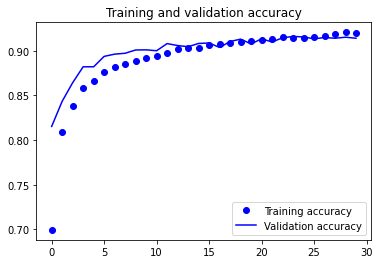

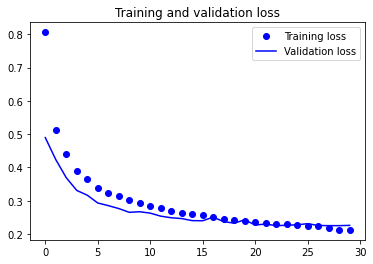

In [30]:
loss = history1.history['accuracy']
val_loss = history1.history['val_accuracy']
epochs = range(30)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(30)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.20721338544487952
Test accuracy: 0.9228000044822693


## **TASK 3**

## Autoencoder(M1) used for classification of fashion MNIST without decoding part

Build the model with same layers as encoder in task1 with dense layers to classify:

* Using the same encoding layers as the M1 
* Removed the decoding layers in M1
* Added dense layer of 10 nodes for classification.

In [0]:
# input layer
c_input_layer = Input(shape=(28, 28, 1))

# encoding architecture
c_encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c_input_layer)
c_encoded_layer1 = MaxPool2D( (2, 2), padding='same')(c_encoded_layer1)
c_encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(c_encoded_layer1)
c_encoded_layer2 = MaxPool2D( (2, 2), padding='same')(c_encoded_layer2)
c_encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(c_encoded_layer2)
c_latent_view    = MaxPool2D( (2, 2), padding='same')(c_encoded_layer3)
flat = Flatten()(c_latent_view)
den = Dense(128, activation='relu')(flat)
out = Dense(10, activation='softmax')(den)
model_3= Model(c_input_layer,out)

Passing the weights from M1 to this classification.

In [0]:
for l1,l2 in zip(model_3.layers[:7],model_2.layers[0:7]):
    l1.set_weights(l2.get_weights())

In [0]:
model_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 16)          0   

In [36]:
batch_size = 256
num_classes = 10
epochs = 20
history2 = model_3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val),callbacks=[early_stopping])
score2 = model_3.evaluate(X_test, y_test, verbose=0)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 47us/step - loss: 0.7262 - accuracy: 0.7427 - val_loss: 0.4993 - val_accuracy: 0.8088
Epoch 2/20
54000/54000 [==============================] - 2s 39us/step - loss: 0.4137 - accuracy: 0.8489 - val_loss: 0.4091 - val_accuracy: 0.8523
Epoch 3/20
54000/54000 [==============================] - 2s 39us/step - loss: 0.3508 - accuracy: 0.8723 - val_loss: 0.3462 - val_accuracy: 0.8728
Epoch 4/20
54000/54000 [==============================] - 2s 39us/step - loss: 0.3199 - accuracy: 0.8833 - val_loss: 0.3144 - val_accuracy: 0.8863
Epoch 5/20
54000/54000 [==============================] - 2s 38us/step - loss: 0.3011 - accuracy: 0.8909 - val_loss: 0.3141 - val_accuracy: 0.8880
Epoch 6/20
54000/54000 [==============================] - 2s 38us/step - loss: 0.2905 - accuracy: 0.8936 - val_loss: 0.3049 - val_accuracy: 0.8893
Epoch 7/20
54000/54000 [==============================] - 2s 38us/ste

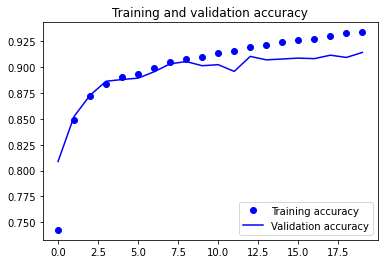

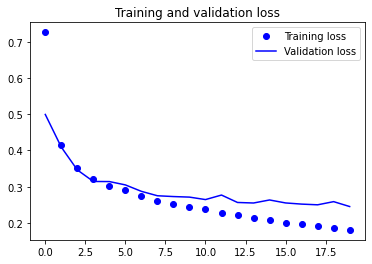

In [37]:
loss = history2.history['accuracy']
val_loss = history2.history['val_accuracy']
epochs = range(20)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(20)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.22535974941253661
Test accuracy: 0.9180999994277954


### **Task 4 Comparision of both the classification models :**

In [0]:
predicted_classes = model.predict_classes(X_test)
y_true = data_test.iloc[:, 0]

In [0]:
predicted_classes2 = model_3.predict(X_test)

In [0]:
predicted_classes2 = np.argmax(np.round(predicted_classes2),axis=1)

In [41]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.89      0.88      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.92      0.82      0.87      1000
     Class 3       0.90      0.96      0.93      1000
     Class 4       0.86      0.90      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.78      0.77      0.78      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [46]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes2, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.87      0.81      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.93      0.82      0.87      1000
     Class 3       0.93      0.93      0.93      1000
     Class 4       0.84      0.92      0.88      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.81      0.72      0.76      1000
     Class 7       0.94      0.96      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



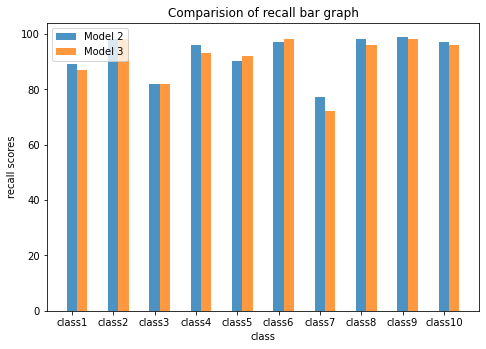

In [50]:
data = [[89,98,82,96,90,97,77,98,99,97],[87,98,82,93,92,98,72,96,98,96]]
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0],alpha = 0.8, width = 0.25,label="Model 2")
ax.bar(X + 0.25, data[1],alpha = 0.8, width = 0.25,label="Model 3")
plt.title("Comparision of recall bar graph")
plt.xlabel("class")
plt.ylabel("recall scores")
labels=['class1','class2','class3','class4','class5','class6','class7','class8','class9','class10']
ax.set_xticks(X)
ax.set_xticklabels(labels)
plt.legend()

print()

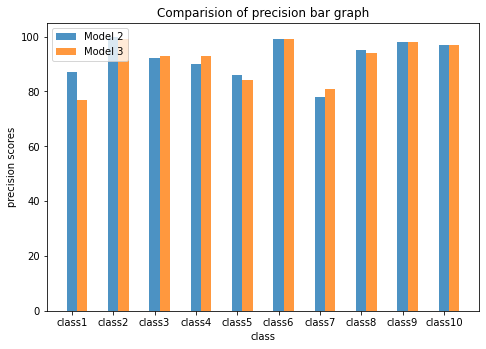

In [48]:
data = [[87,100,92,90,86,99,78,95,98,97],[77,99,93,93,84,99,81,94,98,97]]
X = np.arange(10)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0],alpha = 0.8, width = 0.25,label="Model 2")
ax.bar(X + 0.25, data[1],alpha = 0.8, width = 0.25,label="Model 3")
plt.title("Comparision of precision bar graph")
plt.xlabel("class")
plt.ylabel("precision scores")
labels=['class1','class2','class3','class4','class5','class6','class7','class8','class9','class10']
ax.set_xticks(X)
ax.set_xticklabels(labels)
plt.legend()

print()